<a href="https://colab.research.google.com/github/habibur-rahman-swe/MachineLearningAssignments/blob/assignment-2/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import itertools
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
def process_data(path):
  df = pd.read_csv(path)

  # drop index, Patient Id
  df.drop(columns=['index', 'Patient Id'], inplace=True)

  # changing the level low = 0, medium = 1, high = 1
  df['Level'] = df['Level'].map({'Low': 0, 'Medium': 1, 'High': 1})

  return df

In [139]:
path = "/content/sample_data/cancer patient data sets.csv"
df = process_data(path)

In [140]:
# seperating the feature data and target data  where X = features datas, y = target datas
X = df.drop(columns=['Level'])
Y = df['Level']

In [141]:
X =  preprocessing.StandardScaler().fit(X).transform(X)

In [142]:
# separating train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [143]:
# creating, training logisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, y_train)
yhat = LR.predict(X_test)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [144]:
def plot_confusion_matrix(
                            cm, classes,
                            # i made some edit here
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues
                          ):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, withous normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

print(confusion_matrix(y_test, yhat, labels=[1, 0]))

[[141   4]
 [  5  50]]


Confusion matrix, withous normalization
[[141   4]
 [  5  50]]


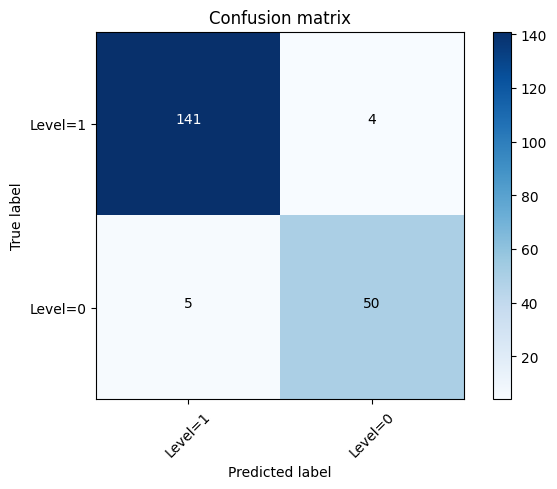

In [145]:

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Level=1','Level=0'], normalize=False,  title='Confusion matrix')

In [146]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.97      0.97      0.97       145

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.95      0.95       200



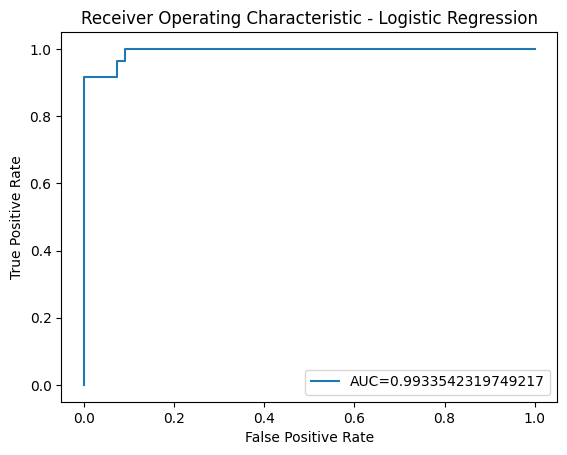

In [147]:
from sklearn import metrics
#define metrics
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc=4)
plt.show()